<a href="https://colab.research.google.com/github/satro1/ML_Projects/blob/main/01_PolynomialRegression/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download dataset from Kaggle

In [1]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USER"] = userdata.get('KAGGLE_USER')

!kaggle datasets download -d rukenmissonnier/manufacturing-data-for-polynomial-regression
! unzip "manufacturing-data-for-polynomial-regression.zip"

Dataset URL: https://www.kaggle.com/datasets/rukenmissonnier/manufacturing-data-for-polynomial-regression
License(s): other
manufacturing-data-for-polynomial-regression.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  manufacturing-data-for-polynomial-regression.zip
replace manufacturing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: manufacturing.csv       


## Read the dataset and remove outliers

In [49]:
import pandas as pd

df = pd.read_csv('manufacturing.csv')

print("Num records:", len(df))
df.head()

Num records: 3957


,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


## Visualize the dataset

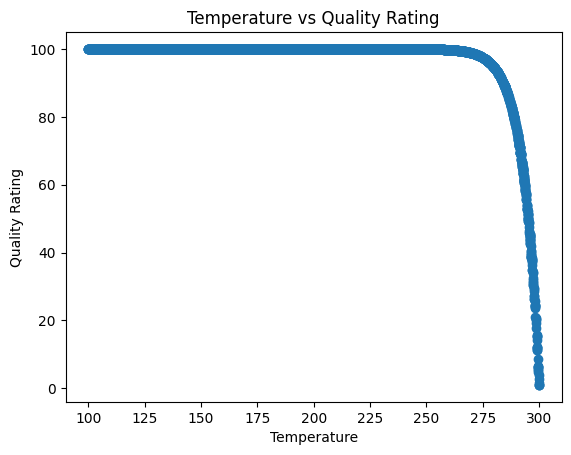

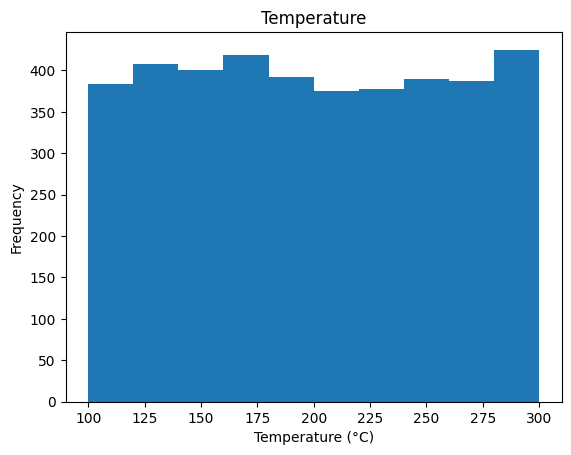

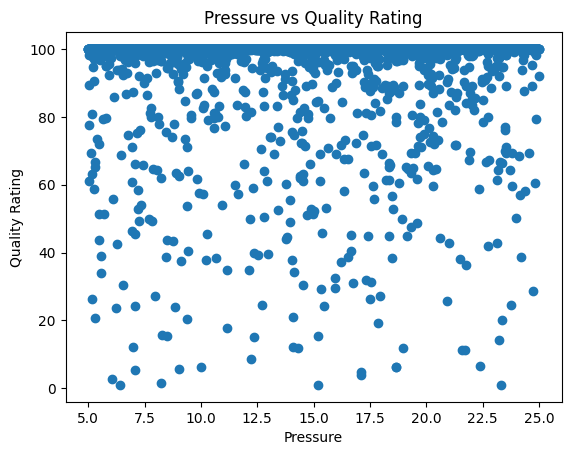

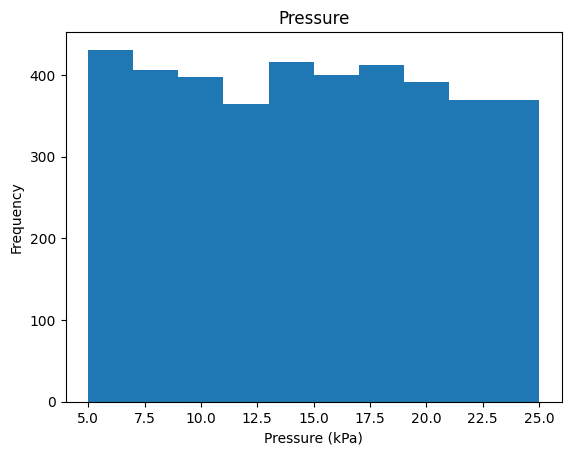

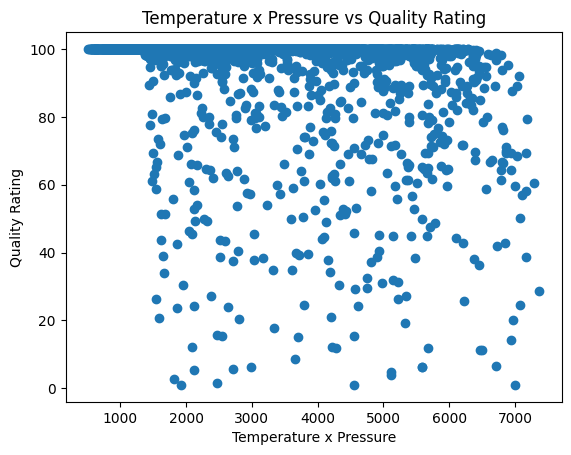

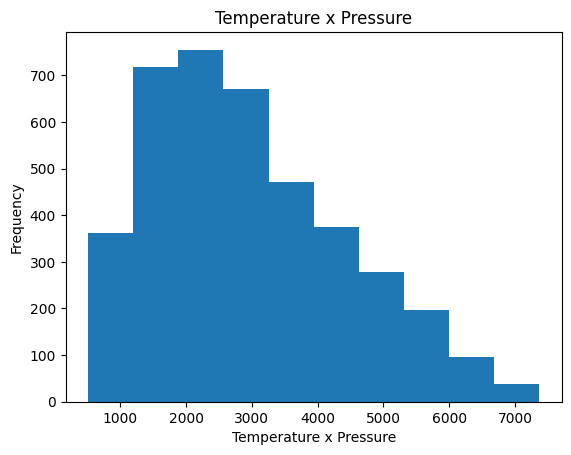

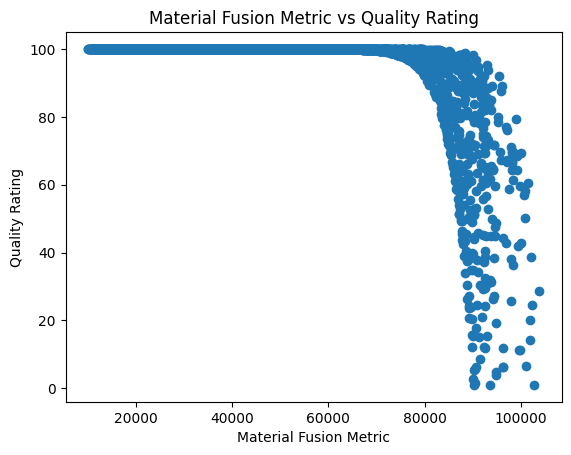

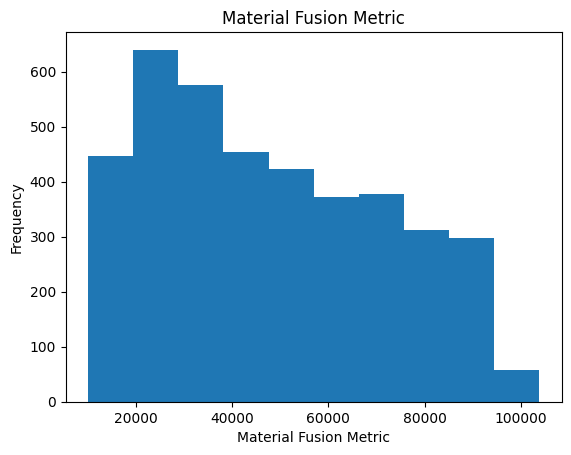

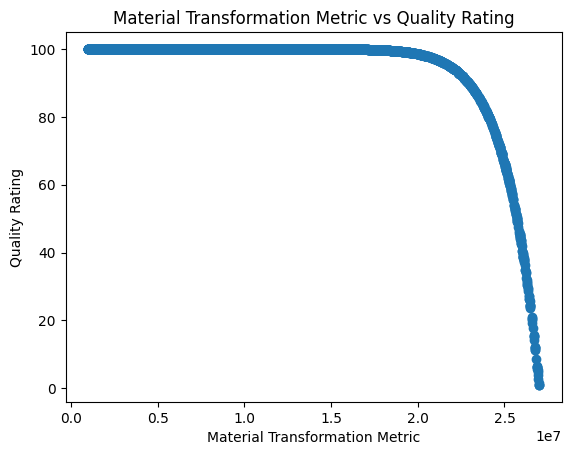

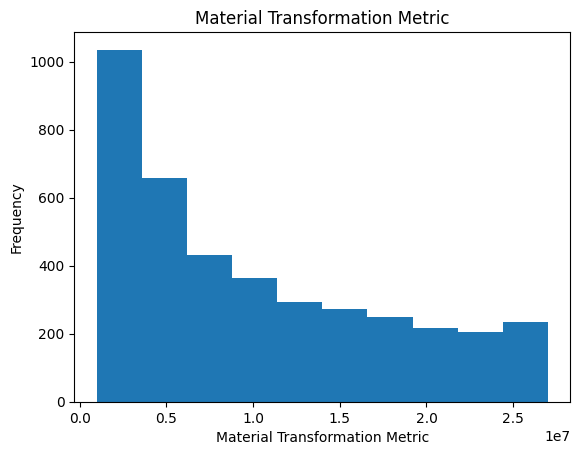

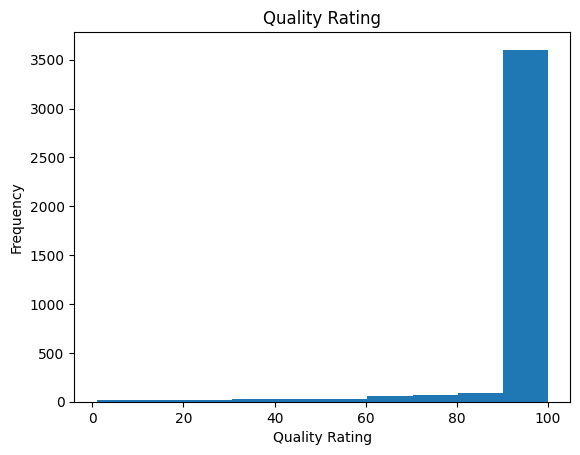

In [51]:
import matplotlib.pyplot as plt

def plot(title, x, y, xlabel, ylabel):
  plt.figure()
  plt.title(title)
  plt.scatter(x, y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

def plot_hist(title, df, x):
  plt.figure()
  plt.title(title)
  plt.hist(df[x])
  plt.xlabel(x)
  plt.ylabel("Frequency")
  plt.show()

plot('Temperature vs Quality Rating', df['Temperature (°C)'], df['Quality Rating'], 'Temperature', 'Quality Rating')
plot_hist('Temperature', df, 'Temperature (°C)')

plot('Pressure vs Quality Rating', df['Pressure (kPa)'], df['Quality Rating'], 'Pressure', 'Quality Rating')
plot_hist('Pressure', df, 'Pressure (kPa)')

plot('Temperature x Pressure vs Quality Rating', df['Temperature x Pressure'], df['Quality Rating'], 'Temperature x Pressure', 'Quality Rating')
plot_hist('Temperature x Pressure', df, 'Temperature x Pressure')

plot('Material Fusion Metric vs Quality Rating', df['Material Fusion Metric'], df['Quality Rating'], 'Material Fusion Metric', 'Quality Rating')
plot_hist('Material Fusion Metric', df, 'Material Fusion Metric')

plot('Material Transformation Metric vs Quality Rating', df['Material Transformation Metric'], df['Quality Rating'], 'Material Transformation Metric', 'Quality Rating')
plot_hist('Material Transformation Metric', df, 'Material Transformation Metric')

plot_hist('Quality Rating', df, 'Quality Rating')

## Prepare the data

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(df[['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure', 'Material Fusion Metric', 'Material Transformation Metric']])
Y = np.array(df['Quality Rating']).reshape(-1, 1)
print("X shape", X.shape)
print("Y shape", Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape", Y_test.shape)
print("m =", X_train.shape[1])
print("n =", X_train.shape[0])


X shape (3957, 5)
Y shape (3957, 1)
X_train shape (3165, 5)
Y_train shape (3165, 1)
X_test shape (792, 5)
Y_test shape (792, 1)
m = 5
n = 3165


## Model this relationshop using Multi Plynomial Regression

y = a$_1$x$_1^2$ + ... + a$_{5}$x$_5^2$ + a$_{6}$x$_1$ + ... + a$_{10}$x$_5$ + b\
$\implies$
$\vec{Y}$ = $\begin{bmatrix}x_{11}^2 & ... & x_{1m}^2 & x_{11} & ... & x_{1m} \\ ... & ... & ... & ... & ... & ... \\ x_{n1}^2 & ... & x_{nm}^2 & x_{n1} & ... & x_{nm}\end{bmatrix}$$\begin{bmatrix}a_1\\...\\a_{2m}\end{bmatrix}$ + $\begin{bmatrix}b\\...\\b\end{bmatrix}$\
$\implies$
$\vec{Y}$ = $\begin{bmatrix}1 & x_{11}^2 & ... & x_{1m}^2 & x_{11} & ... & x_{1m} \\ ... & ... & ... & ... & ... & ... & ... \\ 1 & x_{n1}^2 & ... & x_{nm}^2 & x_{n1} & ... & x_{nm}\end{bmatrix}$$\begin{bmatrix}b\\a_1\\...\\a_{2m}\end{bmatrix}$\
$\implies$
$\vec{Y}$ = X$\vec{A}$\
Using Least Squares:\
$\widehat{\vec{A}}$ = (X$^T$X)$^{-1}$X$^T$$\vec{Y}$ and\
$\widehat{\vec{Y}}$ = X$\widehat{\vec{A}}$

In [53]:
temp = np.hstack((np.ones((X_train.shape[0], 1)), X_train**2))
X_train = np.hstack((temp, X_train))

temp = np.hstack((np.ones((X_test.shape[0], 1)), X_test**2))
X_test = np.hstack((temp, X_test))


A_hat = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T), Y_train)
print("Weights:\n", A_hat)
print("X_train shape:", X_train.shape)

Weights:
 [[-3.07434781e+02]
 [-6.38758904e-02]
 [-2.93816009e-03]
 [ 4.41362839e-07]
 [-4.34819839e-09]
 [-1.12095500e-12]
 [ 8.81340454e+00]
 [ 1.94963537e-01]
 [-2.00680375e-03]
 [ 8.96898266e-05]
 [ 1.59159247e-04]]
X_train shape: (3165, 11)


## Test the model

In [54]:
Y_hat = np.dot(X_test, A_hat)
print("Predicted:\n", Y_hat[:6])
print("Actual:\n", Y_test[:6])
errors = np.abs(Y_hat - Y_test)
print("Errors:\n", errors[:6])
print("Mean error:", np.mean(errors))

Predicted:
 [[ 41.67378492]
 [ 96.65056345]
 [ 90.45566023]
 [104.55476129]
 [ 97.01580028]
 [ 97.41704543]]
Actual:
 [[ 4.05268648]
 [98.87303597]
 [96.91493256]
 [99.95154317]
 [99.99999939]
 [99.99999802]]
Errors:
 [[37.62109844]
 [ 2.22247252]
 [ 6.45927233]
 [ 4.60321812]
 [ 2.98419911]
 [ 2.58295259]]
Mean error: 3.4034182403548696


## Plot residual error

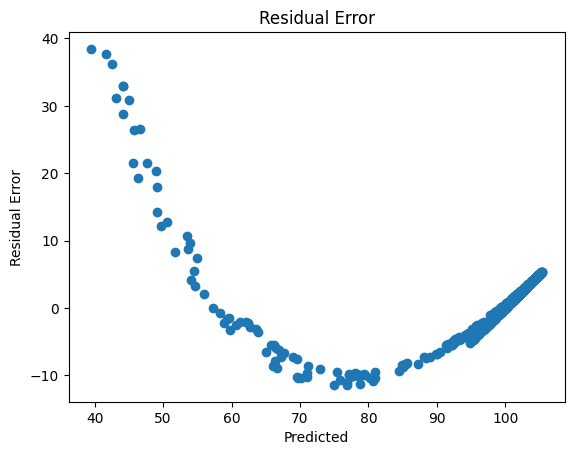

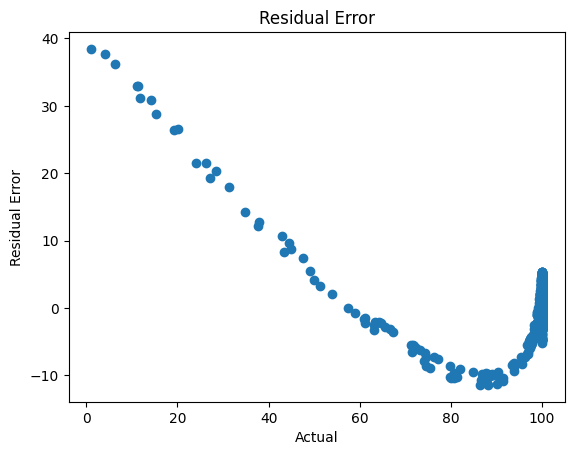

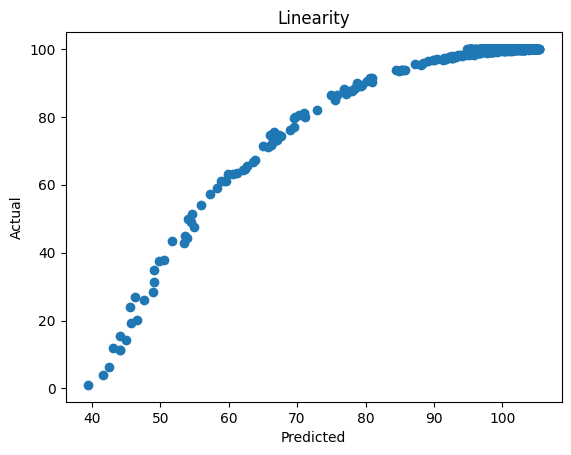

In [55]:
plot("Residual Error", Y_hat, Y_hat - Y_test, "Predicted", "Residual Error")
plot("Residual Error", Y_test, Y_hat - Y_test, "Actual", "Residual Error")
plot("Linearity", Y_hat, Y_test, "Predicted", "Actual")